In [128]:
import os
import glob
import lsst.eotest.image_utils as imutils
import lsst.eotest.sensor as sensorTest
import lsst.eotest.raft as raft
import matplotlib.pyplot as plt
import numpy as np
import yaml
import sys
sys.path.insert(0, '../')
import ccob_utils as u
import ccob_beam as b
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:

%autoreload 2

### Beam reconstruction for three bunches of pixels

In [2]:
config_file = '../ccob_beam_recons_config.yaml'
config = u.load_ccob_config(config_file)

In [3]:
#ref_amp_list = [1,4,7,12,13]
ref_amp_list = [4]
for ref_amp in ref_amp_list:
    beam = b.CcobBeam(config_file=config_file)
    beam.recons(ref_slot='11', ref_amp=ref_amp, ref_pix_x=1000,ref_pix_y=256)
    beam.make_image()
    beam.find_max()
    filename = beam.config['led_name']+'_beam_slot'+beam.properties['ref_slot']+'_amp'+str(ref_amp)+\
               '_refx'+str(beam.properties['ref_pix_x'])+'_refy'+str(beam.properties['ref_pix_y'])+'.pkl'
    print('Printing to ',filename)
    beam.save(os.path.join(beam.config['tmp_dir'],filename))
  

NameError: name 'ref_amp_list' is not defined

In [3]:
import pickle
%matplotlib inline
ref_amp_list = [1,4,7,12, 13]
beam={}
for i,amp in enumerate(ref_amp_list):
    filename = os.path.join(config['tmp_dir'],'red_beam_slot11'+'_amp'+str(amp)+'_refx1000_refy256.pkl')
    with open(filename, 'rb') as f:  
            beam[i] = pickle.load(f)
            


In [78]:
image = beam[1].make_image(3000,3000)
beam[1].find_max()
print(beam[1].properties)

{'npix_x': 300, 'npix_y': 300, 'ref_slot': '11', 'ref_amp': 4, 'ref_pix_x': 1000, 'ref_pix_y': 256, 'npix_for_avg': 30, 'max_xccob': 299.5791930643548, 'max_yccob': 205.53117705901968, 'max_xarg': 1751, 'max_yarg': 1870}


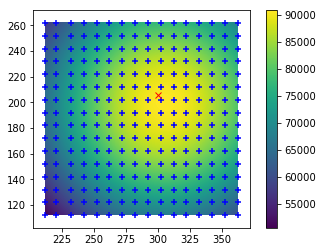

In [75]:
beam[1].plot()

In [ ]:
xarg, yarg = unravel_index(image.argmax(), image['beam'].shape)


### Read in actual data

In [132]:
my_file = '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/red/00_CCOB_red_x295.0_y195.0_0000_20180420200617.fits.fz'
config_file = '../ccob_config_RTM-006.yaml'
config = u.load_ccob_config(config_file)

In [133]:
slot_names=['00','01','02','10','11','12','20','21','22']
fits_files_dict={}
slot='11'
file_list=sorted(u.find_files(config, slot=slot))
print(file_list)
fits_file = file_list[0]
print(fits_files_dict)
gains_dict={}
ccd_dict={}

bias_frames = glob.glob(os.path.join(config['path'], slot+'_bias*'))
#mean_bias_file = slot+'_mean_bias_image_RTM-006.fits'
mean_bias_file = slot+'_mean_bias_image_RTM-006_new.fits'
#    imutils.fits_mean_file(bias_frames, os.path.join(config['tmp_dir'],mean_bias_file))
ccd_dict = sensorTest.MaskedCCD(fits_file, bias_frame=os.path.join(config['tmp_dir'],mean_bias_file))
eotest_results_file = os.path.join(config['eo_data_path'], '{}_eotest_results.fits'.format(ccd_dict.md('LSST_NUM')))
gains_dict = u.gains(eotest_results_file)
    


/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11*uv*****295.0*195.0*
['/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11_CCOB_uv_x295.0_y195.0_0000_20180420211342.fits.fz', '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11_CCOB_uv_x295.0_y195.0_0000_20180420211353.fits.fz', '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11_CCOB_uv_x295.0_y195.0_0000_20180420211402.fits.fz', '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11_CCOB_uv_x295.0_y195.0_0000_20180420211410.fits.fz', '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11_CCOB_uv_x295.0_y195.0_0000_20180420211419.fits.fz', '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11_CCOB_uv_x295.0_y195.0_0000_20180420211429.fits.fz', '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11_CCOB_uv_x295.0_y195.0_0000_20180420211437.fits.fz', '/gpfs/slac/lsst/fs1/g/data/R_and_D/RTM-006/180420/ccob/uv/11_CCOB_uv_x295.0_y195.0_0000_20180420211446.fits.fz', '/gpfs

In [134]:
mosaic, amp_coord = u.make_ccd_2d_array(fits_file, gains=gains_dict)

In [24]:
amp_coord

{(0, 0): (1, 3584, 4096, 2002, 4004, False, True),
 (1, 0): (2, 3072, 3584, 2002, 4004, False, True),
 (2, 0): (3, 2560, 3072, 2002, 4004, False, True),
 (3, 0): (4, 2048, 2560, 2002, 4004, False, True),
 (4, 0): (5, 1536, 2048, 2002, 4004, False, True),
 (5, 0): (6, 1024, 1536, 2002, 4004, False, True),
 (6, 0): (7, 512, 1024, 2002, 4004, False, True),
 (7, 0): (8, 0, 512, 2002, 4004, False, True),
 (0, 1): (9, 0, 512, 0, 2002, True, False),
 (1, 1): (10, 512, 1024, 0, 2002, True, False),
 (2, 1): (11, 1024, 1536, 0, 2002, True, False),
 (3, 1): (12, 1536, 2048, 0, 2002, True, False),
 (4, 1): (13, 2048, 2560, 0, 2002, True, False),
 (5, 1): (14, 2560, 3072, 0, 2002, True, False),
 (6, 1): (15, 3072, 3584, 0, 2002, True, False),
 (7, 1): (16, 3584, 4096, 0, 2002, True, False)}

In [25]:
def pix_coord_in_mosaic(amp_coord, amp, posx_in_amp, posy_in_amp):
    subdict = {k:v for k, v in amp_coord.items() if v[0] == amp}
    v = subdict[list(subdict.keys())[0]]
    idx_x = v[1] + posx_in_amp
    idx_y = v[3] + posy_in_amp
    if v[5] == True: # flip-x
        idx_x = v[2] - posx_in_amp
    if v[6] == True: # flip-y
        idx_y = v[4] - posy_in_amp
    return idx_x, idx_y

In [26]:
ref_amp_list = [1,4,7,13]
ref_pix={}
for amp in ref_amp_list:
    ref_pix[amp] = pix_coord_in_mosaic(amp_coord, amp, 256, 1000)


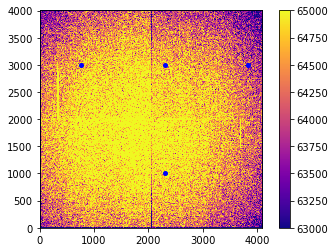

In [28]:
plt.imshow(mosaic, vmin=63000, vmax=65000, origin='lower', cmap='plasma')
for amp in ref_amp_list:
    plt.plot([ref_pix[amp][0]], [ref_pix[amp][1]], marker='o', markersize=4, color='blue')
plt.colorbar()


In [176]:
ref_amp_list = [1,4,7,13]
beam={}
for i,amp in enumerate(ref_amp_list):
    filename = os.path.join(config['tmp_dir'],'red_beam_slot11'+'_amp'+str(amp)+'_refx1000_refy256.pkl')
    with open(filename, 'rb') as f:  
            beam[i] = pickle.load(f)

In [12]:
beam[1].properties

{'npix_x': 300,
 'npix_y': 300,
 'ref_slot': '11',
 'ref_amp': 4,
 'ref_pix_x': 1000,
 'ref_pix_y': 256,
 'npix_for_avg': 30,
 'max_xccob': 299.5791930643548,
 'max_yccob': 205.53117705901968}

In [29]:
xpos_ccob = 295.0
ypos_ccob = 195.0
ref_amp = 4
ref_pix = pix_coord_in_mosaic(amp_coord, ref_amp, 256, 1000)


In [30]:
ref_pix

(2304, 3004)

In [31]:
delta_x = xpos_ccob - beam[1].properties['max_xccob']
delta_y = ypos_ccob - beam[1].properties['max_yccob']
delta_x_pix = int(delta_x/0.01)
delta_y_pix = int(delta_y/0.01)

print('deplacement in mm: dx=%0.2f dy=%0.2f'%(delta_x, delta_y))
print('deplacement in pixels: dx=%i dy=%i'%(delta_x_pix, delta_y_pix))

deplacement in mm: dx=-4.58 dy=-10.53
deplacement in pixels: dx=-457 dy=-1053


In [32]:
geom_center_pos=(ref_pix[0]+delta_x_pix, ref_pix[1]+delta_y_pix)
geom_center_pos

(1847, 1951)

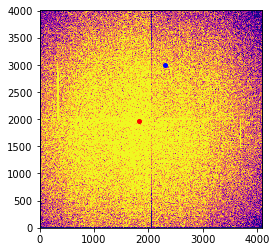

In [202]:
plt.imshow(mosaic, vmin=63000, vmax=65000, origin='lower', cmap='plasma')
plt.plot([ref_pix[0]], [ref_pix[1]], marker='o', markersize=4, color='blue')
plt.plot([geom_center_pos[0]], [geom_center_pos[1]], marker='o', markersize=4, color='red')

In [213]:
mosaic.shape

(4004, 4096)

In [80]:
# distance from beam center to ccd edges in mm
dist_to_left = geom_center_pos[0]*0.01
dist_to_bottom = geom_center_pos[1]*0.01
dist_to_right = (mosaic.shape[1] - geom_center_pos[0])*0.01
dist_to_top = (mosaic.shape[0] - geom_center_pos[1])*0.01
print(dist_to_left,dist_to_bottom,dist_to_right,dist_to_top)
print(dist_to_left+dist_to_right, dist_to_bottom+dist_to_top)

18.47 19.51 22.490000000000002 20.53
40.96 40.040000000000006


In [33]:
b = beam[1]

In [34]:
b.beam_image.keys()

dict_keys(['nodes', 'xarr', 'yarr', 'beam', 'f_interp'])

In [66]:
b.properties["max_xccob"] = b.beam_image['xarr'][b.properties['max_xarg']]
print(b.properties["max_xccob"])

299.579193064


In [115]:
b.make_image(ncols=3000,nrows=3000)
print(b.beam_image['beam'].shape)
b.find_max()

(3000, 3000)


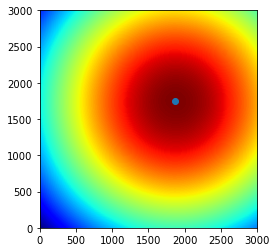

In [116]:
plt.imshow(b.beam_image['beam'], origin='lower', cmap='jet')
plt.plot([b.properties['max_xarg']],[b.properties['max_yarg']], marker='o')

305.531177059 199.579193064


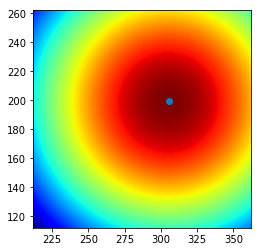

In [118]:
extent = [min(b.beam_image['nodes']['xarr']),
          max(b.beam_image['nodes']['xarr']),
          min(b.beam_image['nodes']['yarr']), 
          max(b.beam_image['nodes']['yarr'])]
plt.imshow(b.beam_image['beam'], extent=extent, origin='lower', cmap='jet')
plt.plot([b.properties['max_xccob']],[b.properties['max_yccob']], marker='o')
print(b.properties['max_xccob'],b.properties['max_yccob'])

In [119]:
bbox=(b.properties['max_xccob']-dist_to_left,
      b.properties['max_xccob']+dist_to_right,
      b.properties['max_yccob']-dist_to_bottom,
      b.properties['max_yccob']+dist_to_top)

In [120]:
bbox

(287.06117705901966, 328.02117705901969, 180.06919306435481, 220.1091930643548)

In [121]:
xarr2 = np.linspace(bbox[0],bbox[1],mosaic.shape[1])
yarr2 = np.linspace(bbox[2],bbox[3],mosaic.shape[0])
tmp = b.beam_image['f_interp'](xarr2, yarr2)

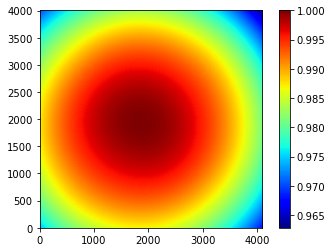

In [122]:
plt.imshow(tmp/np.max(tmp.flatten()), origin='lower', cmap='jet')
plt.colorbar()

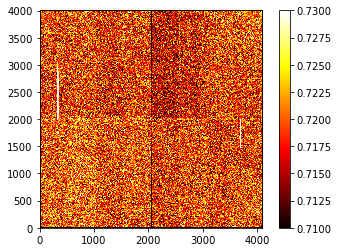

In [131]:
plt.imshow(mosaic/tmp, vmin=0.71, vmax=0.73, origin='lower', cmap='hot')
plt.colorbar()

In [ ]:
slac_flat_file='qe_raft_acq/v0/38892/S22/E2V-CCD250-217-Dev_lambda_flat_1000_5867D_20180417043114.fits 